TODO: Quitar los fragmentos de códigos para los gráficos y convertirlo en una función que reciba como parámetros la columna y el conjunto de colores.

# 1. Introduction

A company wants to automate the loan qualifying procedure based on the information given by customers while filling out an online application form. It's expected that the ML models development can help the company predict loan approval in accelarating decision-making process for determining wether an applicant is eligible for a loan or not.

## 1.1 Objectives

We are aiming to: 
 - Analyze customer data provided in dataset (EDA)
 - Build various ML models that can predict loan approval
 
The ML models used are:
 1. Logistic Regression
 2. K-Nearest Neighbour
 3. Support Vector Machine
 4. Naive Bayes
 5. Decision Tree
 6. Random Forest
 7. Gradient Boost
 8. Neural Network

## 1.2 Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mso

import warnings
warnings.filterwarnings('ignore')

## 2. Dataset description

In [2]:
df = pd.read_csv('Data/train_loan_dataset.csv')
print(df.shape)
df.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


There are 13 columns: 
 - Categorical:
   - **Loan_ID**: A unique identifier for each loan application.
   - **Gender**: The gender of the loan applicant.
   - **Married**: Indicates whether the applicant is married.
   - **Dependents**: Represents the number of dependents the applicant has.
   - **Education**: Indicates the educational qualification of the applicant.
   - **Self_Employed**: Specifies whether the applicant is self-employed.
   - **Property_Area**: The area where the property associated with the loan is located.
   - **Loan_Status**: The status of the loan application (binary - Y for approved, N for not approved).
   - **Credit_History**: Credit history of the applicant (binary - 1.0 for good credit history, 0.0 for bad credit history).
      - 1.0: Typically signifies "Good Credit History."
      - 0.0: Typically signifies "Bad Credit History."
   - **Loan_Amount_Term**: The term or duration for which the loan is applied in months.
   
   
 - Numerical:
   - **ApplicantIncome**: The income of the individual applying for the loan.
   - **CoapplicantIncome**: The income of the co-applicant, if applicable.
   - **LoanAmount**: The amount of the loan applied for.
   

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('category')
df['Credit_History'] = df['Credit_History'].astype('category')

# 3. Data exploration

It's time to perform data exploration of the imported raw dataset.

## 3.1 Categorical variables

### 3.1.1 Loan_ID

In [5]:
df['Loan_ID'].value_counts(dropna=True).sum()

614

There are 614 unique IDS which means there are no duplicates or missing IDs

### 3.1.2 Gender

In [6]:
males = df['Gender'].value_counts().loc['Male']
females = df['Gender'].value_counts().loc['Female']
nulls = len(df[df.Gender.isnull()])

values = [males, females]
labels = ['Male', 'Female']
colors = ['blue', 'orange']

In [7]:
print("Percentage of male applicant: {:.2f}% ({males})".format((males / (len(df.Gender))*100),
                                                               males=males))
print("Percentage of female applicant: {:.2f}% ({females})".format((females / (len(df.Gender))*100),
                                                                   females=females))
print("Missing values percentage: {:.2f}% ({nulls})".format((nulls / (len(df.Gender))*100),
                                                         nulls=nulls))

Percentage of male applicant: 79.64% (489)
Percentage of female applicant: 18.24% (112)
Missing values percentage: 2.12% (13)


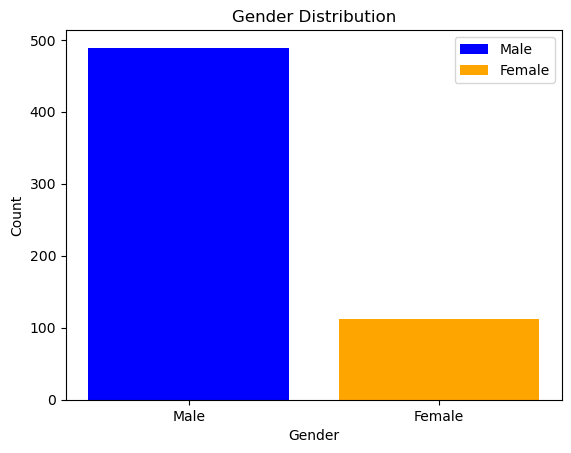

In [8]:
fig, ax = plt.subplots()

for label, value, color in zip(labels, values, colors):
    ax.bar(label, value, color=color, label=label)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')

plt.legend()
plt.show()

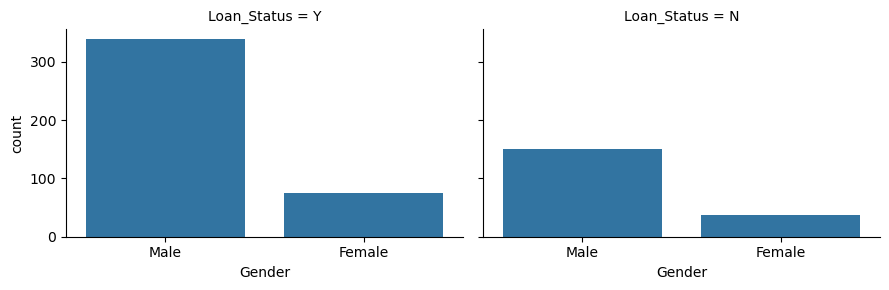

In [9]:
grid = sns.FacetGrid(df,
                     col='Loan_Status', 
                     aspect=1.5)
grid.map(sns.countplot, 'Gender');

The number of male applicants is significantly higher compared to female applicants. Furthermore, it can be seen there are missing values.

Apparently, there is no relation between loan approval and gender

### 3.1.3 Married

In [10]:
marrieds = df['Married'].value_counts().loc['Yes']
not_marrieds = df['Married'].value_counts().loc['No']
nulls = len(df[df['Married'].isnull()])

In [11]:
print("Percentage of married: {:.2f}% ({marrieds})".format((marrieds / (len(df.Married))*100),
                                                           marrieds=marrieds))
print("Percentage of Not married applicant: {:.2f}% ({not_marrieds})".format((not_marrieds / (len(df.Married))*100),
                                                                             not_marrieds=not_marrieds))
print("Missing values percentage: {:.2f}% ({nulls})".format((nulls / (len(df.Married))*100),
                                                            nulls=nulls))

Percentage of married: 64.82% (398)
Percentage of Not married applicant: 34.69% (213)
Missing values percentage: 0.49% (3)


In [12]:
labels = ['Married', 'Not married']
values = [marrieds, not_marrieds]

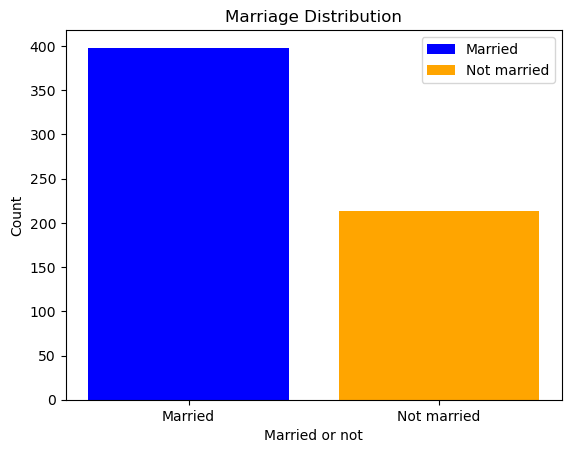

In [13]:
fig, ax = plt.subplots()

for label, value, color in zip(labels, values, colors):
    ax.bar(label, value, color=color, label=label)

plt.xlabel('Married or not')
plt.ylabel('Count')
plt.title('Marriage Distribution')

plt.legend()
plt.show()

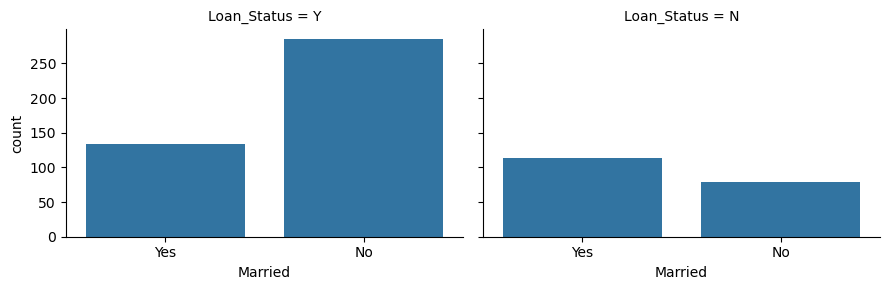

In [14]:
grid = sns.FacetGrid(df,
                     col='Loan_Status',
                     aspect=1.5)
grid.map(sns.countplot, 'Married');

The majority of applicants are married, constituting about 64.82% of the total.
Not married applicants make up a significant portion as well, accounting for approximately 34.69%.

### 3.1.4 Education

In [15]:
print(df['Education'].isnull().sum())

0


Since there are no missing values:

In [16]:
grads = df['Education'].unique()
values = []
labels = []

for grad in grads:
    temp = df['Education'].value_counts().loc[grad]
    values.append(temp)
    labels.append(grad)
    print("Percentage of {grad} applicant: {:.2f}% ({aux})".format((temp / (len(df.Education))*100),
                                                                    grad=grad,
                                                                    aux=temp))

Percentage of Graduate applicant: 78.18% (480)
Percentage of Not Graduate applicant: 21.82% (134)


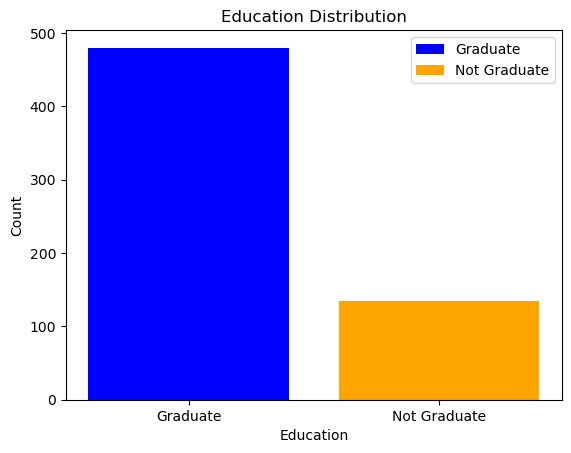

In [17]:
fig, ax = plt.subplots()

for label, value, color in zip(labels, values, colors):
    ax.bar(label, value, color=color, label=label)

plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution')

plt.legend()
plt.show()

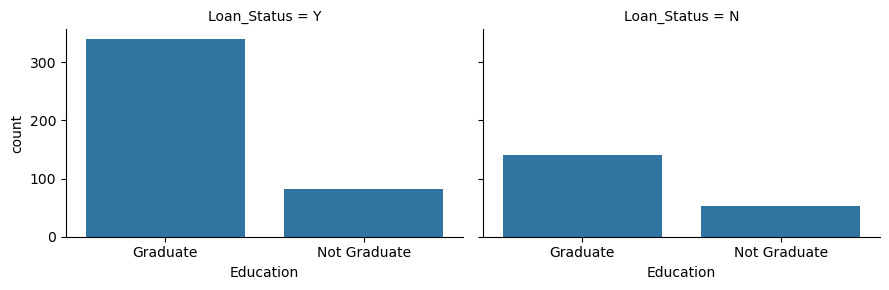

In [18]:
grid = sns.FacetGrid(df,
                     col='Loan_Status', 
                     aspect=1.5)
grid.map(sns.countplot, 'Education');

The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.

Being graduated or not seems to have similar chances of getting a loan, so it appears to be not a non important feature.

### 3.1.5 Self Employed

In [19]:
self_no = df['Self_Employed'].value_counts().loc['No']
self_yes = df['Self_Employed'].value_counts().loc['Yes']
nulls = df['Self_Employed'].isnull().sum()

labels = ['No', 'Yes']
values = [self_no, self_yes]

print("Percentage of non self employed: {:.2f}% ({nos})".format((self_no / (len(df.Self_Employed))*100),
                                                                 nos=self_no))
print("Percentage of self_employes: {:.2f}% ({yes})".format((self_yes / (len(df.Self_Employed))*100),
                                                             yes=self_yes))
print("Missing values percentage: {:.2f}% ({nulls})".format((nulls / (len(df.Self_Employed))*100),
                                                            nulls=nulls))

Percentage of non self employed: 81.43% (500)
Percentage of self_employes: 13.36% (82)
Missing values percentage: 5.21% (32)


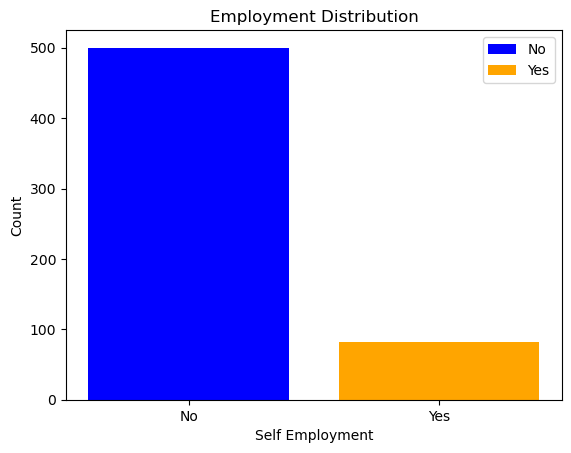

In [20]:
fig, ax = plt.subplots()

for label, value, color in zip(labels, values, colors):
    ax.bar(label, value, color=color, label=label)

plt.xlabel('Self Employment')
plt.ylabel('Count')
plt.title('Employment Distribution')

plt.legend()
plt.show()

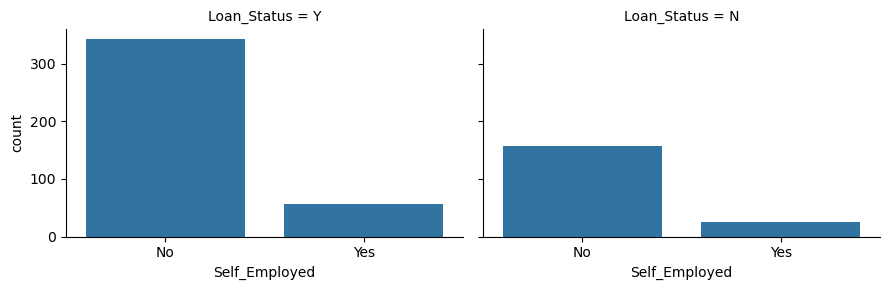

In [21]:
grid = sns.FacetGrid(df,
                     col='Loan_Status',
                     aspect=1.5)
grid.map(sns.countplot, 'Self_Employed');

Most of the loan applicants seems to be non self employed. Furthermore, it can be seen there are missing values in this column.

### 3.1.6 Credit history

In [22]:
ones = df['Credit_History'].value_counts().loc[1]
zeros = df['Credit_History'].value_counts().loc[0]
nulls = df['Credit_History'].isnull().sum()

labels = ['Positive credit history', 'Negative credit history']
values = [ones, zeros]

print("Percentage of positive credit history: {:.2f}% ({ones})".format((ones / (len(df.Credit_History))*100),
                                                                      ones=ones))
print("Percentage of negative credit history: {:.2f}% ({zeros})".format((zeros / (len(df.Credit_History))*100),
                                                                       zeros=zeros))
print("Missing values percentage: {:.2f}% ({nulls})".format((nulls / (len(df.Credit_History))*100),
                                                            nulls=nulls))

Percentage of positive credit history: 77.36% (475)
Percentage of negative credit history: 14.50% (89)
Missing values percentage: 8.14% (50)


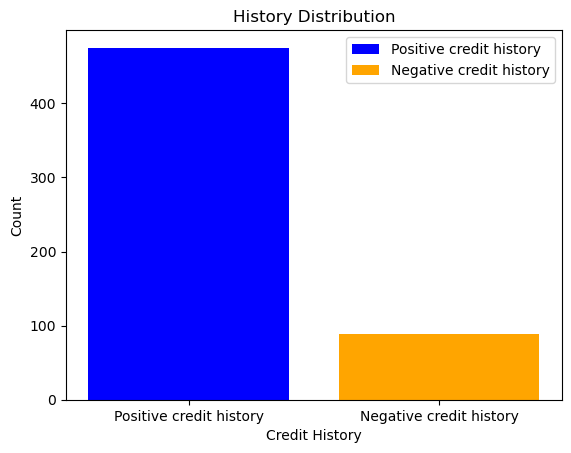

In [23]:
fig, ax = plt.subplots()

for label, value, color in zip(labels, values, colors):
    ax.bar(label, value, color=color, label=label)

plt.xlabel('Credit History')
plt.ylabel('Count')
plt.title('History Distribution')

plt.legend()
plt.show()

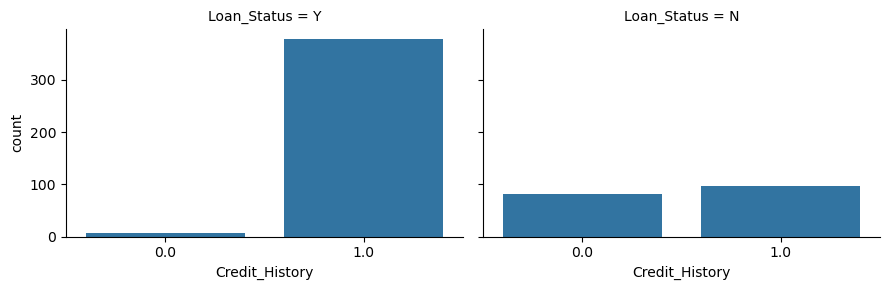

In [24]:
grid = sns.FacetGrid(df,
                     col='Loan_Status',
                     aspect=1.5)
grid.map(sns.countplot, 'Credit_History');

The number of applicants that have good credit history is higher compared to applicants that have bad credit history, and most of applicant with positive history are granted with the loan.

### 3.1.7 Dependents

In [25]:
deps = df['Dependents'].dropna().unique()
nulls = df['Dependents'].isnull().sum()

values = []
labels = []
colors = ['blue', 'orange', 'yellow', 'purple']

for dep in deps:
    temp = df['Dependents'].value_counts().loc[dep]
    values.append(temp)
    labels.append(dep+' dependent')
    print("Percentage of {dep} applicant: {:.2f}% ({aux})".format((temp / (len(df.Dependents))*100),
                                                                    dep=dep,
                                                                    aux=temp))
    
    
print("Missing values percentage: {:.2f}% ({nulls})".format((nulls / (len(df.Dependents))*100),
                                                            nulls=nulls))

Percentage of 0 applicant: 56.19% (345)
Percentage of 1 applicant: 16.61% (102)
Percentage of 2 applicant: 16.45% (101)
Percentage of 3+ applicant: 8.31% (51)
Missing values percentage: 2.44% (15)


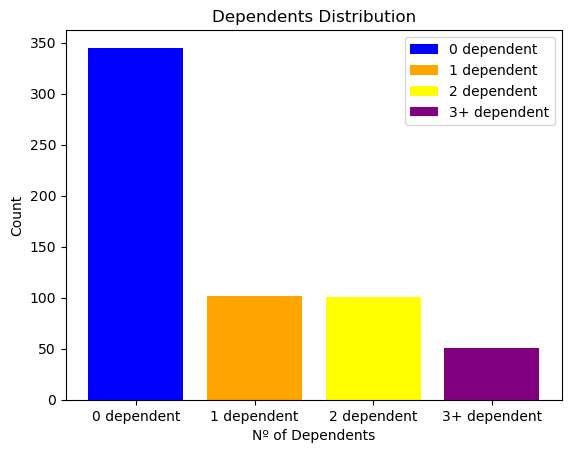

In [26]:
fig, ax = plt.subplots()

for label, value, color in zip(labels, values, colors):
    ax.bar(label, value, color=color, label=label)

plt.xlabel('Nº of Dependents')
plt.ylabel('Count')
plt.title('Dependents Distribution')

plt.legend()
plt.show()

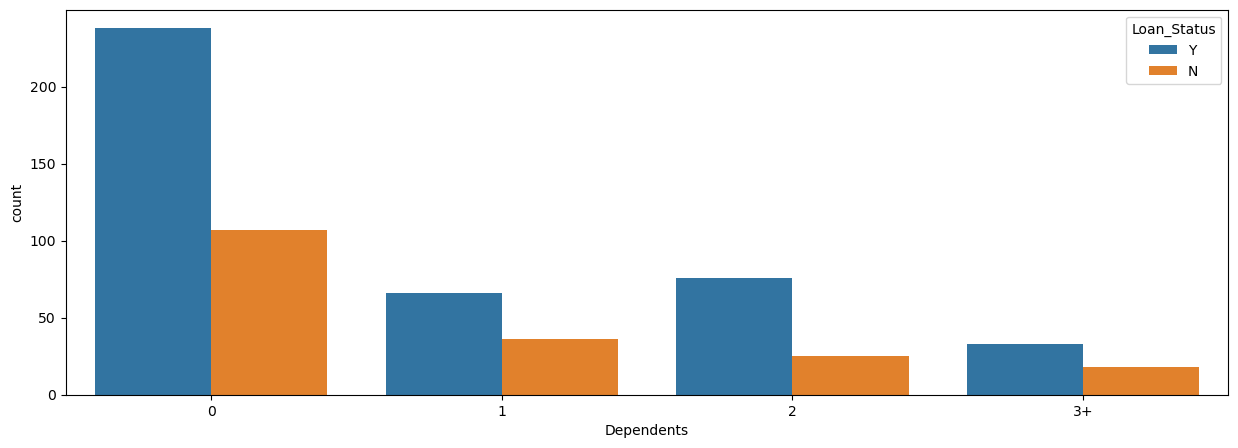

In [27]:
plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=df);

Most of the applicants have no dependents and also have most chances to get a loan.

### 3.1.8 Property Area

In [28]:
areas = df['Property_Area'].unique()
values = []
labels = []
colors = ['blue', 'orange', 'yellow']

for area in areas:
    temp = df['Property_Area'].value_counts().loc[area]
    values.append(temp)
    labels.append(area)
    print("Percentage of {area} applicant: {:.2f}% ({aux})".format((temp / (len(df.Property_Area))*100),
                                                                    area=area,
                                                                    aux=temp))

Percentage of Urban applicant: 32.90% (202)
Percentage of Rural applicant: 29.15% (179)
Percentage of Semiurban applicant: 37.95% (233)


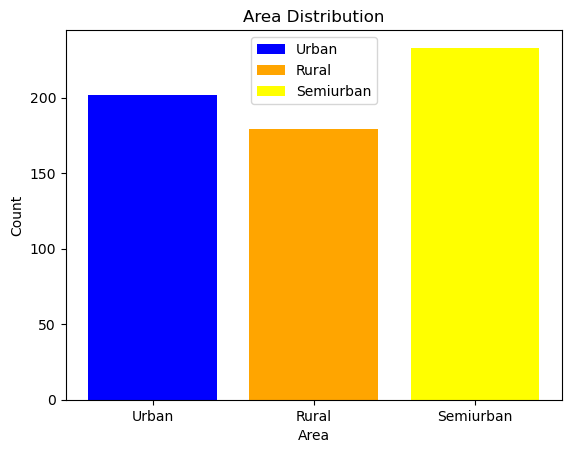

In [29]:
fig, ax = plt.subplots()

for label, value, color in zip(labels, values, colors):
    ax.bar(label, value, color=color, label=label)

plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Area Distribution')

plt.legend()
plt.show()

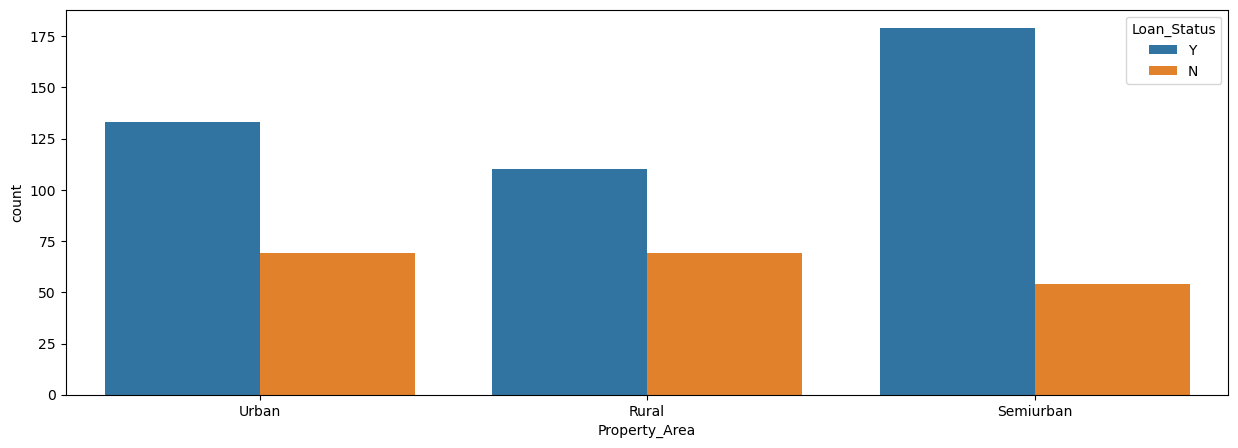

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=df);

It has a balanced distribution, so all the areas are likely to apply for a loan, but semiurban has more chance to get it, followed by urban.

### 3.1.9 Loan Amount Term

In [31]:
terms = df['Loan_Amount_Term'].dropna().unique()
nulls = df['Loan_Amount_Term'].isnull().sum()

values = []
labels = []
colors = sns.color_palette("husl", len(terms))

for term in terms:
    temp = df['Loan_Amount_Term'].value_counts().loc[term]
    values.append(temp)
    labels.append(str(term))
    print("Percentage of {term} months term: {:.2f}% ({aux})".format((temp / (len(df.Loan_Amount_Term))*100),
                                                                    term=term,
                                                                    aux=temp))
    
    
print("Missing values percentage: {:.2f}% ({nulls})".format((nulls / (len(df.Loan_Amount_Term))*100),
                                                            nulls=nulls))

Percentage of 360.0 months term: 83.39% (512)
Percentage of 120.0 months term: 0.49% (3)
Percentage of 240.0 months term: 0.65% (4)
Percentage of 180.0 months term: 7.17% (44)
Percentage of 60.0 months term: 0.33% (2)
Percentage of 300.0 months term: 2.12% (13)
Percentage of 480.0 months term: 2.44% (15)
Percentage of 36.0 months term: 0.33% (2)
Percentage of 84.0 months term: 0.65% (4)
Percentage of 12.0 months term: 0.16% (1)
Missing values percentage: 2.28% (14)


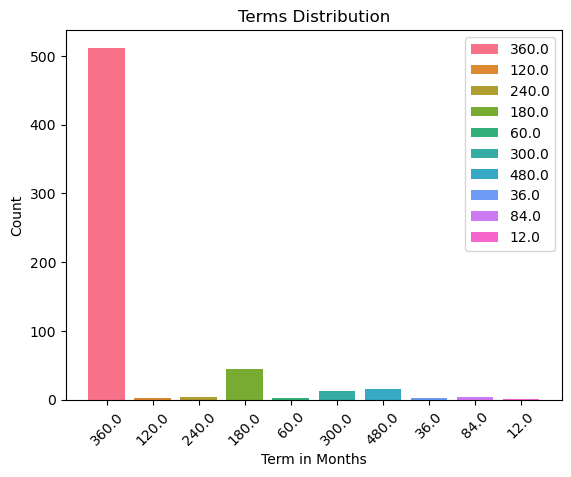

In [32]:
fig, ax = plt.subplots()

for label, value, color in zip(labels, values, colors):
    ax.bar(label, value, color=color, label=label)

plt.xlabel('Term in Months')
plt.ylabel('Count')
plt.title('Terms Distribution')
plt.xticks(rotation=45)


plt.legend()
plt.show()

## 3.2 Numerical variables

In [33]:
df.groupby('Loan_Status').median()

,ApplicantIncome,CoapplicantIncome,LoanAmount
Loan_Status,,,
N,3833.5,268.0,129.0
Y,3812.5,1239.5,126.0


It's grouped by median because outliers have low impact on it.

### 3.2.1 Histogram

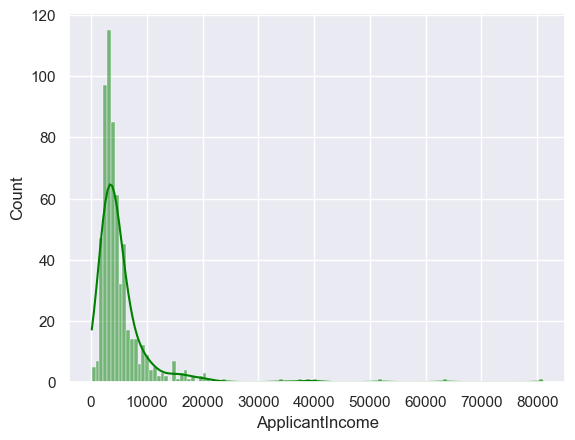

In [34]:
sns.set(style="darkgrid")

fig = plt.plot()

sns.histplot(data=df,
             x="ApplicantIncome",
             kde=True,
             color='green');

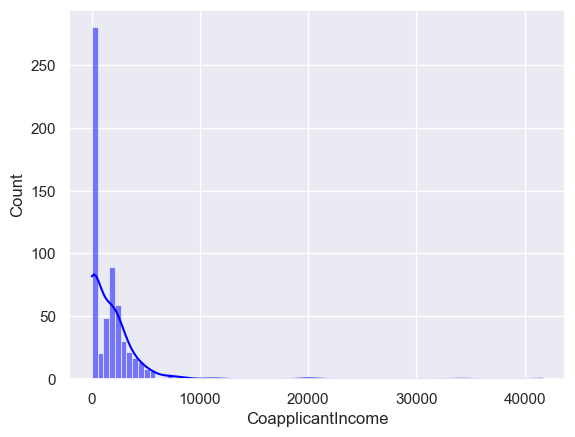

In [35]:
sns.histplot(data=df,
             x="CoapplicantIncome",
             kde=True,
             color='blue');

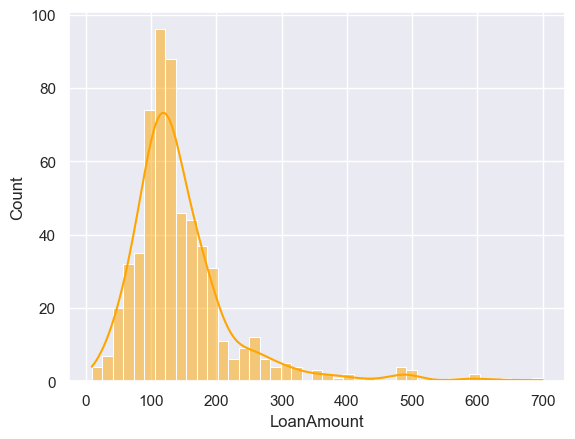

In [36]:
sns.histplot(data=df,
             x="LoanAmount",
             kde=True,
             color='orange');

### 3.2.2 Violin plot

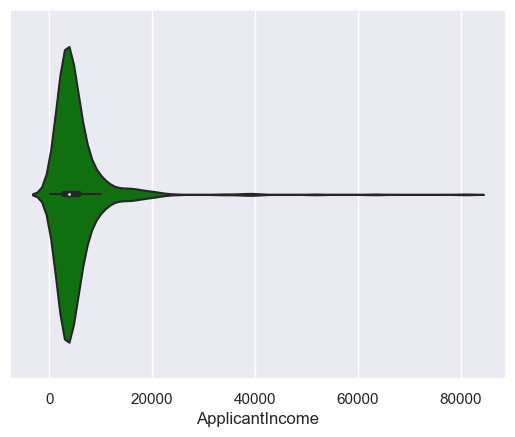

In [37]:
fig = plt.plot()

sns.violinplot(data=df,
             x="ApplicantIncome",
             color='green');

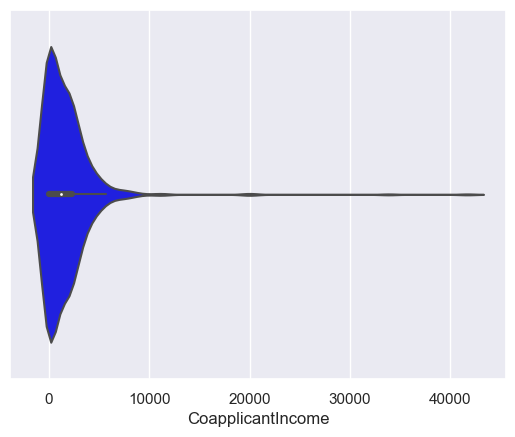

In [38]:
sns.violinplot(data=df,
             x="CoapplicantIncome",
             kde=True,
             color='blue');

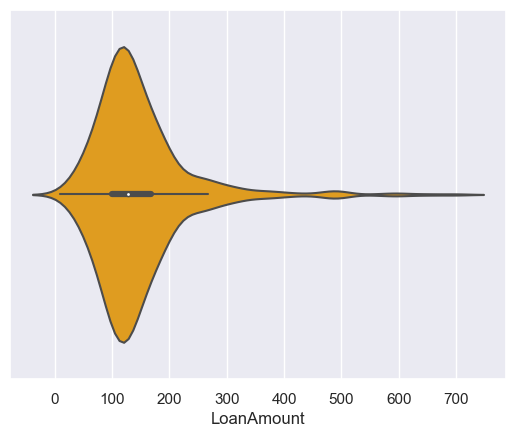

In [39]:
sns.violinplot(data=df,
             x="LoanAmount",
             kde=True,
             color='orange');

### 3.2.3 Boxplot

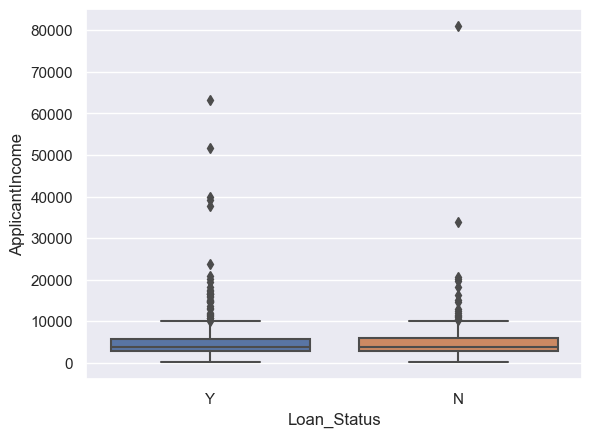

In [40]:
sns.boxplot(x="Loan_Status",
            y="ApplicantIncome",
            data=df);

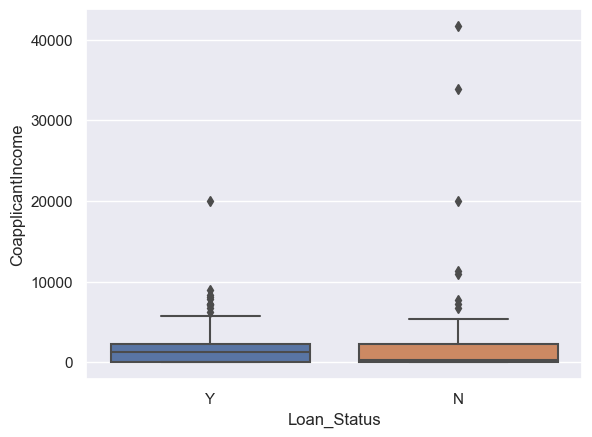

In [41]:
sns.boxplot(x="Loan_Status",
            y="CoapplicantIncome",
            data=df);

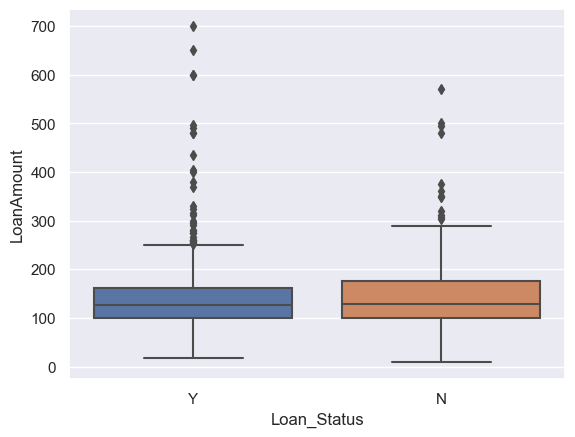

In [42]:
sns.boxplot(x="Loan_Status",
            y="LoanAmount",
            data=df);

Observations:
  - The distribution of Applicant income, Co Applicant Income, and Loan Amount are positively skewed and it has outliers